<a href="https://colab.research.google.com/github/abinashbordoloi/MyColabWork/blob/main/IITM_CCBR/Solution_of_Python_questions_Abinash_Bordoloi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ABINASH BORDOLOI

This is an exercise notebook for selection of candidates in Centre for Computational Brain Research (CCBR), IIT Madras

##(c) 2024 CCBR

---

Name:Abinash Bordoloi, Email:abinashbordoloi07@gmail.com, IITM-Student-email: 21f2000278@ds.study.iitm.ac.in,Phone no: +91-7578040598, Diploma/ IITM BS Program/Also Final Year BTech Student at Gauhati University Institute of Science and Tenchnology

---
## Instructions
  
*   make a copy of this notebook
*   write your name as the first block of the copied notebook
*   complete the codes in the spaces below
*   share the saved notebook to [ -- email id here --]

## Good practices
*   avoid single alphabet variable names, use meaningful names
*   use typing in function signatures [https://docs.python.org/3/library/typing.html]
*   use lambdas, partials to improve readability [https://docs.python.org/3/library/functools.html]
*   use builtin datatypes as much as possible [https://docs.python.org/3/library/collections.html]
*   use exception handling [https://docs.python.org/3/tutorial/errors.html#handling-exceptions]
*   write docstring comments and inline comments to make the code self-explanatory


**PS**: These are individual exercises. In comments against your solutions, provide web links/blogs/documents that you used to solve the exercises. Do not use chatGPT

---
## Basic imports and data

In [ ]:
import skimage
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [ ]:
data_3d = skimage.data.brain()

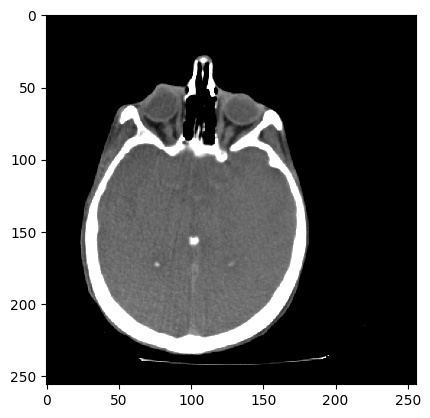

In [ ]:
plt.imshow(data_3d[7,...],cmap='gray',vmin=5000,vmax=10000)

In [ ]:
data_3d.shape,data_3d.dtype

((10, 256, 256), dtype('uint16'))

In [ ]:
data_3d.min(),data_3d.max()

(0, 51076)

In [ ]:
data_2d_color = skimage.data.skin()

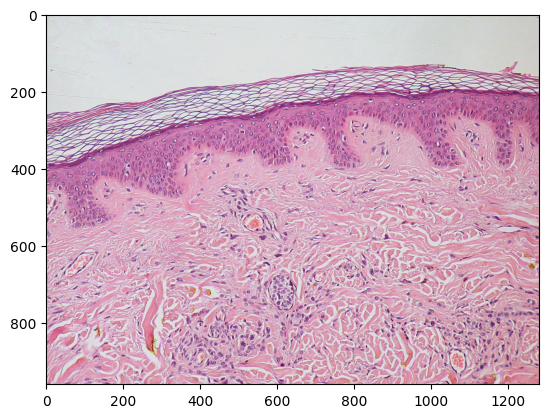

In [ ]:
plt.imshow(data_2d_color)

In [ ]:
data_2d_color.shape, data_2d_color.dtype

((960, 1280, 3), dtype('uint8'))

In [ ]:
data_2d_discrete = skimage.data.shepp_logan_phantom()

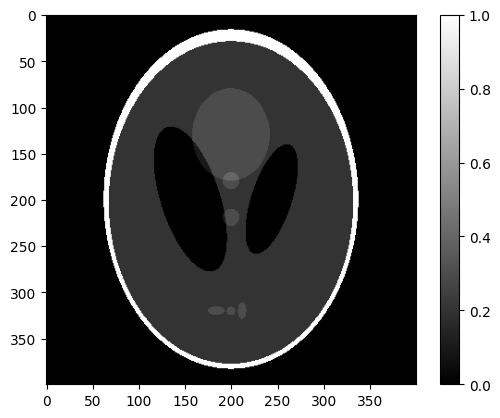

In [ ]:
plt.imshow(data_2d_discrete,cmap='gray')
plt.colorbar()

In [ ]:
data_2d_discrete.shape, data_2d_discrete.dtype

((400, 400), dtype('float64'))

In [ ]:
data_2d_discrete.min(),data_2d_discrete.max()

(0.0, 1.0)

---
# **Basic python tasks**

### Task 1

1(a): Define a function named ```describe```, which returns the properties of the numpy array passed as argument. Use ```scipy.stats.describe```

The function should return an array of dicts which can be loaded in pandas

In [ ]:
# Your 1(a) solution
def describe(array):
    stats = scipy.stats.describe(array.flatten())
    return [{
        'Min': stats.minmax[0],
        'Max': stats.minmax[1],
        'Mean': stats.mean,
        'Variance': stats.variance,
        'Skewness': stats.skewness,
        'Kurtosis': stats.kurtosis
    }]

1(b): Call your function on the data loaded in previous section, wrap it in a pandas dataframe, and print the result

In [ ]:
# Your 1(b) solution
data_properties = pd.DataFrame(describe(data_3d) + describe(data_2d_color) + describe(data_2d_discrete))
print(data_properties)

   Min      Max         Mean      Variance  Skewness   Kurtosis
0  0.0  51076.0  3698.287448  4.112756e+07  2.881774  10.029499
1  0.0    255.0   188.079179  1.570137e+03 -1.075380   0.911639
2  0.0      1.0     0.123159  4.573012e-02  2.941647   9.440198


# Task 2

2(a): Define a function to flatten a nested dict (left to right in figure below)

The dict values can be string, numeric, or array of dict.

String and numeric are mandatory in your solution. **Implementation for array is bonus**.

In case of array, the output dict should have keys named using array position.

e.g if
```
"d":[
  {"e":v3,"f":v4},
  {"g":v5,"h":v6}
]

```
then flatten it as
```
"d.0.e":v3,
"d.0.f":v4,
"d.1.g":v5,
"d.1.h":v6
```

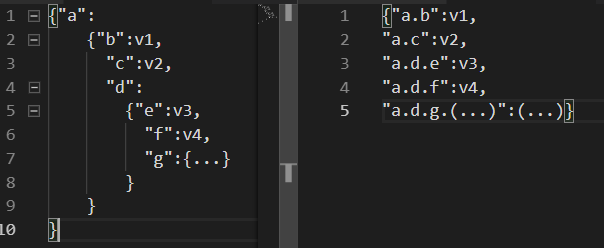

In [ ]:
# your solution 2(a) here
def flatten_dict(d, parent_key='', sep='.'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f"{new_key}.{i}", sep=sep).items())
                else:
                    items.append((f"{new_key}.{i}", item))
        else:
            items.append((new_key, v))
    return dict(items)

2(b): Define a function to unflatten (right to left of figure above).

Dict values can be string or numeric. implementation for array is bonus

In [ ]:
# your solution 2(b) here

def unflatten_dict(d, sep='.'):
    result = {}
    for key, value in d.items():
        keys = key.split(sep)
        current = result
        for k in keys[:-1]:
            if k not in current:
                current[k] = {}
            current = current[k]
        current[keys[-1]] = value
    return result


In [ ]:
# Sample nested dictionary
nested_dict = {
    "a": 1,
    "b": {
        "c": 2,
        "d": [
            {"e": 3, "f": 4},
            {"g": 5, "h": 6}
        ]
    }
}


In [ ]:
# Flatten the nested dictionary
flattened_dict = flatten_dict(nested_dict)
print("Flattened dictionary:")
print(flattened_dict)


Flattened dictionary:
{'a': 1, 'b.c': 2, 'b.d.0.e': 3, 'b.d.0.f': 4, 'b.d.1.g': 5, 'b.d.1.h': 6}


In [ ]:
# Unflatten the flattened dictionary
unflattened_dict = unflatten_dict(flattened_dict)
print("\nUnflattened dictionary:")
print(unflattened_dict)


Unflattened dictionary:
{'a': 1, 'b': {'c': 2, 'd': {'0': {'e': 3, 'f': 4}, '1': {'g': 5, 'h': 6}}}}


# Task 3

Write a NumPy program to create a 3x3 identity matrix and stack it vertically and horizontally.

In [ ]:
# Your solution
import numpy as np

# Creating a 3x3 identity matrix
identity_matrix = np.identity(3)

# Stacking it vertically
vertical_stack = np.vstack((identity_matrix, identity_matrix))
print("Stacked vertically:")
print(vertical_stack)

# Stacking it horizontally
horizontal_stack = np.hstack((identity_matrix, identity_matrix))
print("\nStacked horizontally:")
print(horizontal_stack)


Stacked vertically:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Stacked horizontally:
[[1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]]


---
# **Numpy/Scipy tasks**

# Task 4

Define a function to crop a square region from a given array, centered at a given r,c position, of given side length.

Your function should return the subarray, and rect (r1,c1,r2,c2), handling underflow and overflow

the rect should be such that
```
subarray = givenarray(r1:r2,c1:c2)
```

In [ ]:


import numpy as np

def crop_array(arr: np.ndarray, pos: tuple, sidelen: int):
    # Unpack the position
    r, c = pos

    # Calculate half side length
    half_side = sidelen // 2

    # Calculate the boundaries of the crop region
    r1 = max(0, r - half_side)
    c1 = max(0, c - half_side)
    r2 = min(arr.shape[0], r + half_side + 1)
    c2 = min(arr.shape[1], c + half_side + 1)

    # Crop the array
    cropped_subarray = arr[r1:r2, c1:c2]

    # Define the rect tuple
    rect = (r1, c1, r2, c2)

    return cropped_subarray, rect

# Example usage:
arr = np.arange(25).reshape(5, 5)
pos = (2, 2)  # Center position
sidelen = 3
cropped_subarray, rect = crop_array(arr, pos, sidelen)

print("Cropped subarray:")
print(cropped_subarray)

print("\nBounding box (r1, c1, r2, c2):")
print(rect)


Cropped subarray:
[[ 6  7  8]
 [11 12 13]
 [16 17 18]]

Bounding box (r1, c1, r2, c2):
(1, 1, 4, 4)


# Task 5

Call your function from task4 by passing **data_2d_color**, and random points and side lengths

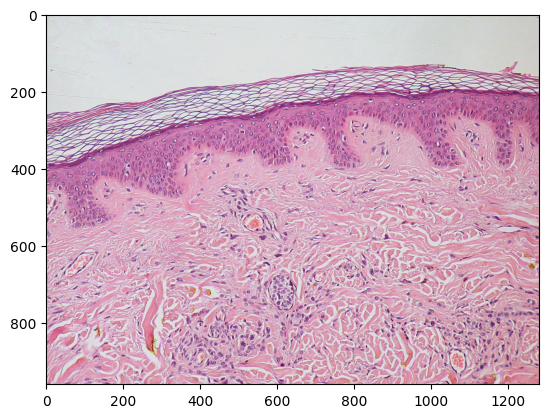

Cropped subarray:
[[[213 222 227]
  [213 224 228]
  [212 220 223]
  ...
  [210 215 209]
  [210 217 210]
  [209 216 209]]

 [[213 221 224]
  [212 222 224]
  [212 220 223]
  ...
  [217 223 211]
  [217 223 213]
  [215 222 214]]

 [[211 217 217]
  [208 217 216]
  [213 218 222]
  ...
  [221 228 212]
  [223 229 215]
  [223 231 218]]

 ...

 [[210 219 218]
  [209 217 219]
  [212 211 216]
  ...
  [214 216 211]
  [216 218 213]
  [218 220 217]]

 [[208 220 218]
  [210 220 219]
  [212 213 217]
  ...
  [207 208 203]
  [208 209 204]
  [210 210 208]]

 [[220 215 219]
  [220 214 218]
  [215 218 225]
  ...
  [216 219 236]
  [216 218 231]
  [217 220 227]]]

Bounding box (r1, c1, r2, c2):
(20, 30, 41, 51)


In [ ]:
data_2d_color = skimage.data.skin()
plt.imshow(data_2d_color)
plt.show()

# Random position and side length
random_position = (30, 40)  # Example random position
side_length = 20  # Example side length


# Crop the array
cropped_subarray, rect = crop_array(data_2d_color, random_position, side_length)

print("Cropped subarray:")
print(cropped_subarray)

print("\nBounding box (r1, c1, r2, c2):")
print(rect)

# Task 6

Write a single expression to make the color dimension of data_2d_color come to the first dimension.

In [ ]:
# Your solution here

data_2d_color_transposed = np.transpose(data_2d_color, (2, 0, 1))


Show the shape of your result. Then write a single expression to revert color to third dimension. Verify by showing the shape and plt.imshow

Shape after transposing: (3, 960, 1280)
Shape after reverting: (960, 1280, 3)


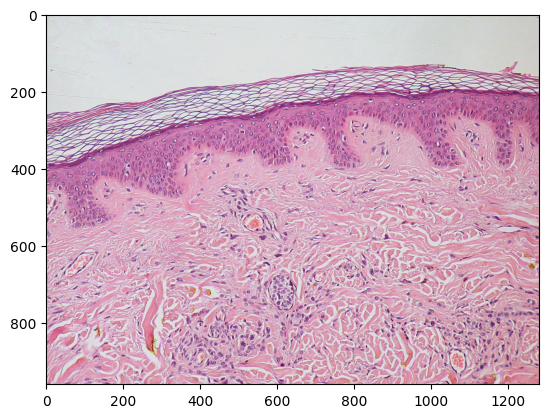

In [ ]:
# Your solution here
# Show the shape of the transposed array
print("Shape after transposing:", data_2d_color_transposed.shape)

# Reverting color to the third dimension
data_2d_color_reverted = np.transpose(data_2d_color_transposed, (1, 2, 0))

# Show the shape of the reverted array
print("Shape after reverting:", data_2d_color_reverted.shape)

# Display the image with reverted color dimension
plt.imshow(data_2d_color_reverted)
plt.show()


# Task 7

7(a): Define a function to create a list of (r,c) that trace a semicircle. Use the function signature in the cell below

In [ ]:
from enum import Enum, auto

class Direction(Enum):
  UP=auto()
  DOWN=auto()
  LEFT=auto()
  RIGHT=auto()

def make_semicircle(cen_r:int=250, cen_c:int=250, rad:int=10, facing:Direction=Direction.UP):

  ptslist = []

  # your solution here
  if facing == Direction.UP:
        for i in range(cen_r - rad, cen_r + 1):
            j = int(np.sqrt(rad ** 2 - (i - cen_r) ** 2) + cen_c)
            ptslist.append((i, j))
  elif facing == Direction.DOWN:
      for i in range(cen_r, cen_r + rad + 1):
          j = int(-np.sqrt(rad ** 2 - (i - cen_r) ** 2) + cen_c)
          ptslist.append((i, j))
  elif facing == Direction.LEFT:
      for j in range(cen_c - rad, cen_c + 1):
          i = int(-np.sqrt(rad ** 2 - (j - cen_c) ** 2) + cen_r)
          ptslist.append((i, j))
  elif facing == Direction.RIGHT:
      for j in range(cen_c, cen_c + rad + 1):
          i = int(np.sqrt(rad ** 2 - (j - cen_c) ** 2) + cen_r)
          ptslist.append((i, j))

  return ptslist


# Task 8

 Call the function make_semicircle with random cen_r and cen_c between 100 to 400, and with the returned ptslist, set the points in a zero array of dtype bool, and size (512,512). Use plt.imshow to confirm the result

Make sure to handle over- and underflows in ptslist wrt 512 x 512

118 282


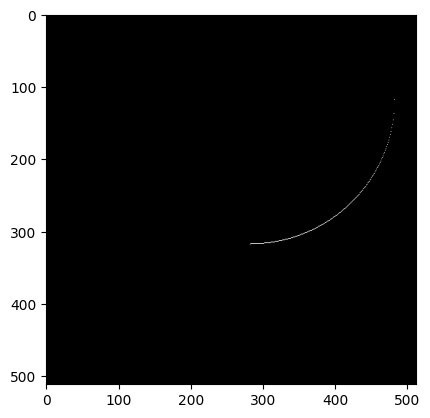

In [ ]:
cen_r,cen_c = np.random.randint(100,400,2)
print(cen_r,cen_c)

ptslist = make_semicircle(cen_r,cen_c,200,Direction.RIGHT)

# your solution here
# Create a zero array of dtype bool with size (512, 512)
zero_array = np.zeros((512, 512), dtype=bool)

# Set the points in the zero array based on ptslist
for r, c in ptslist:
    zero_array[r, c] = True

# Display the result using plt.imshow
plt.imshow(zero_array, cmap='gray')
plt.show()

# Task 9

Generate a synthetic gradient image using NumPy and apply a basic threshold to create a binary image effect.

Modify the generate_gradient_image function to create a different gradient pattern.

Experiment with different threshold values in the apply_threshold function.

Add a function to compute and print the histogram of the original and thresholded images.

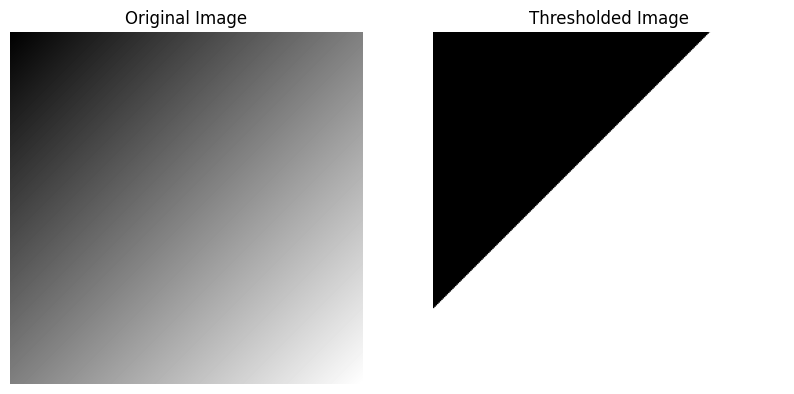

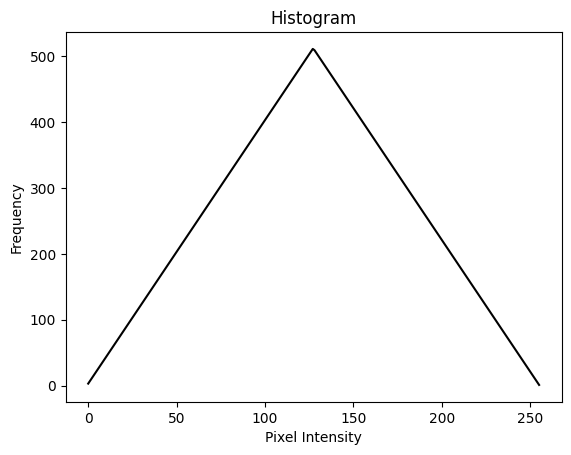

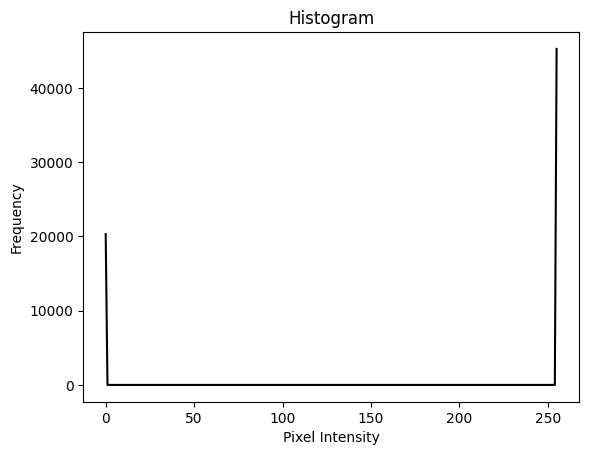

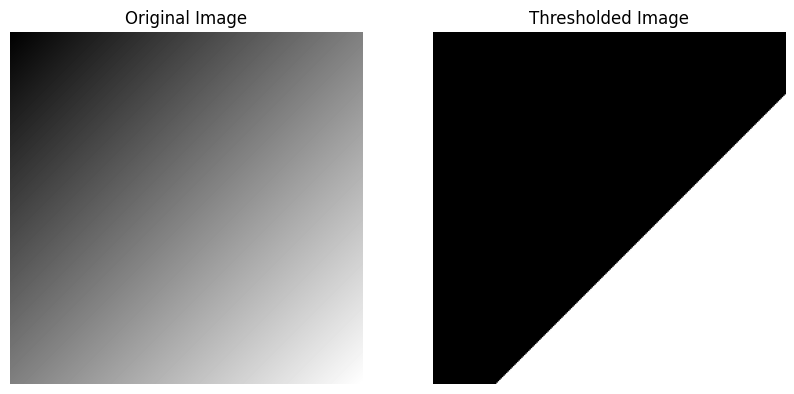

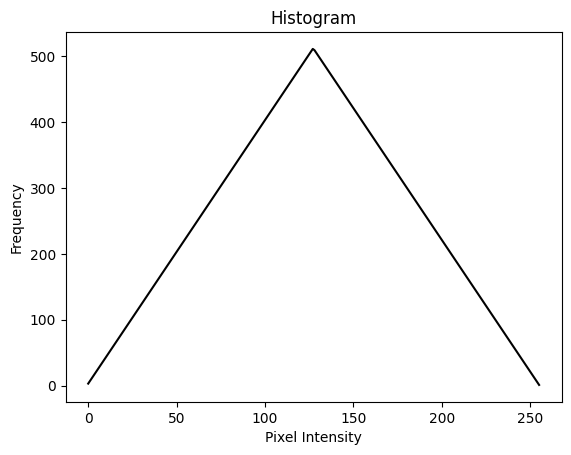

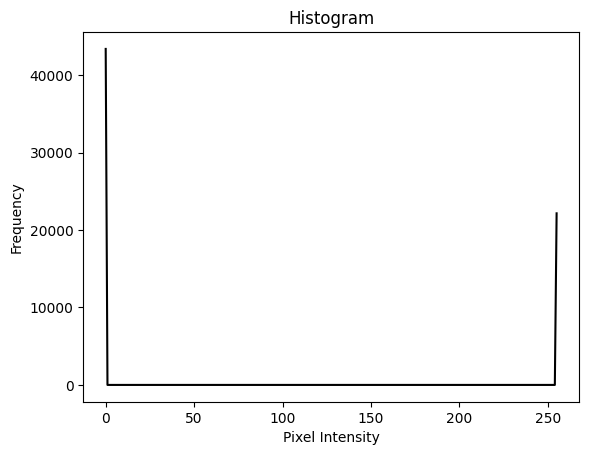

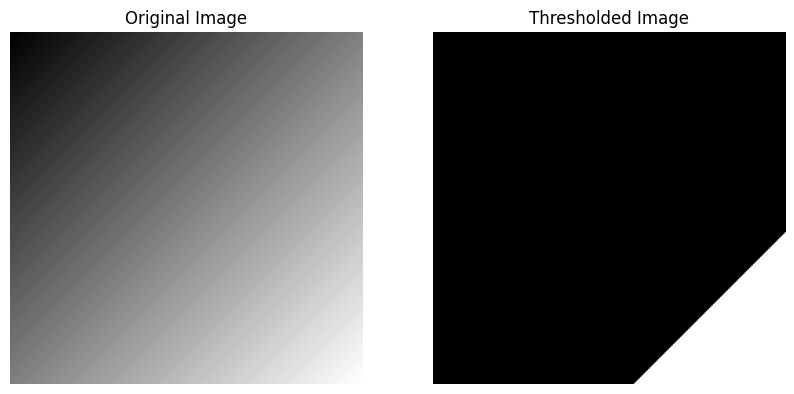

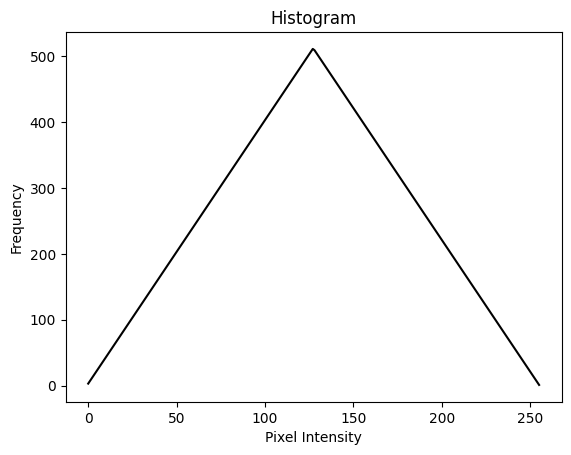

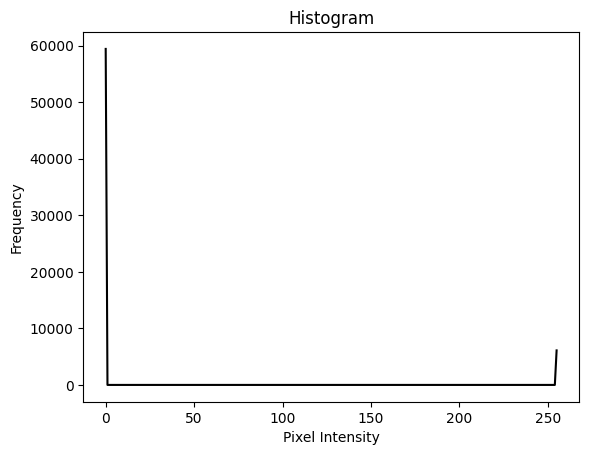

In [ ]:
def generate_gradient_image(size):
    """Generate a 2D gradient image of given size."""

    # Create a linear gradient image from 0 to 255
    x = np.linspace(0, 255, size[0])
    y = np.linspace(0, 255, size[1])
    xx, yy = np.meshgrid(x, y, indexing='ij')
    gradient_image = (xx + yy) / 2
    return gradient_image

def apply_threshold(image, threshold=127.5):

    """Apply a simple threshold to the image."""

    # Apply threshold
    binary_image = np.where(image > threshold, 255, 0)
    return binary_image

def display_images(original, modified):
    """Display the original and modified images."""
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Thresholded Image")
    plt.imshow(modified, cmap='gray')
    plt.axis('off')

    plt.show()

def compute_histogram(image):
    """Compute and print the histogram of the image."""
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    plt.plot(hist, color='black')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()


# Main execution
size = (256, 256)
original_image = generate_gradient_image(size)

# Experimenting with different threshold values
threshold_values = [100, 150, 200]

for threshold in threshold_values:
    thresholded_image = apply_threshold(original_image, threshold)
    display_images(original_image, thresholded_image)
    compute_histogram(original_image)
    compute_histogram(thresholded_image)

# Task 10 (Bonus)

# **Binary Path Sum**

A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

The path sum of a path is the sum of the node's values in the path.

Given the root of a binary tree, return the maximum path sum of any non-empty path.


**Example 1:**

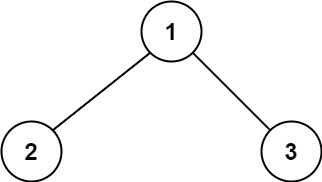

**Input: root** = [1,2,3]

**Output:** 6

**Explanation:** The optimal path is 2 -> 1 -> 3 with a path sum of 2 + 1 + 3 = 6.

**Example 2:**

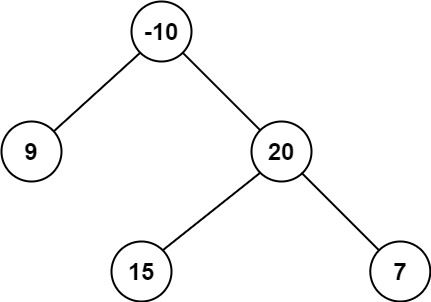

**Input: root** = [-10,9,20,null,null,15,7]

**Output:** 42

**Explanation:** The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.

In [ ]:
# Definition for a binary tree node.
from typing import Optional
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def maxPathSum(self, root: Optional[TreeNode]) -> int:
        # Helper function to recursively calculate the maximum path sum
        def maxPathSumHelper(node):
            nonlocal max_sum
            if not node:
                return 0

            # Recursively calculate maximum path sum for left and right subtrees
            left_sum = max(0, maxPathSumHelper(node.left))
            right_sum = max(0, maxPathSumHelper(node.right))

            # Update the maximum path sum found so far
            max_sum = max(max_sum, node.val + left_sum + right_sum)

            # Return the maximum path sum passing through this node
            return node.val + max(left_sum, right_sum)

        max_sum = float('-inf')
        maxPathSumHelper(root)
        return max_sum




In [ ]:
# Test case 1
# Input: [1,2,3]
# Output: 6
root1 = TreeNode(1)
root1.left = TreeNode(2)
root1.right = TreeNode(3)
solution = Solution()
print(solution.maxPathSum(root1))  # Output: 6

# Test case 2
# Input: [-10,9,20,null,null,15,7]
# Output: 42
root2 = TreeNode(-10)
root2.left = TreeNode(9)
root2.right = TreeNode(20)
root2.right.left = TreeNode(15)
root2.right.right = TreeNode(7)
print(solution.maxPathSum(root2))  # Output: 42


6
42
